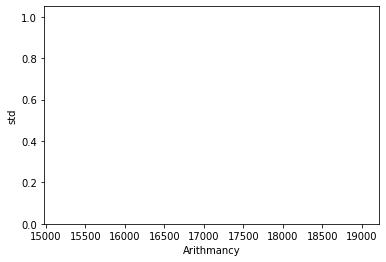

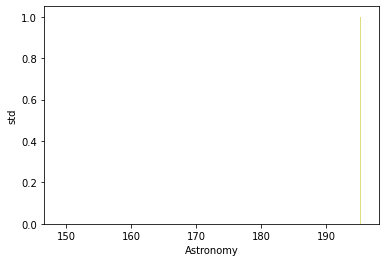

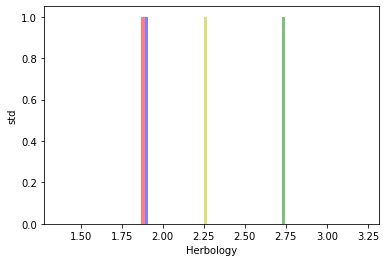

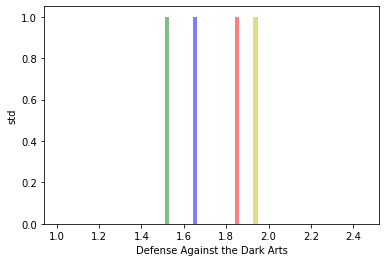

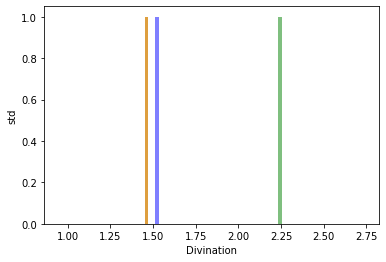

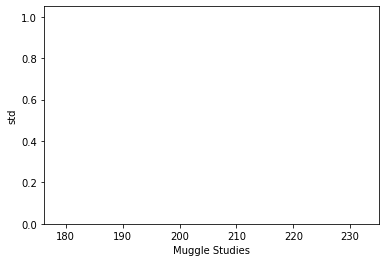

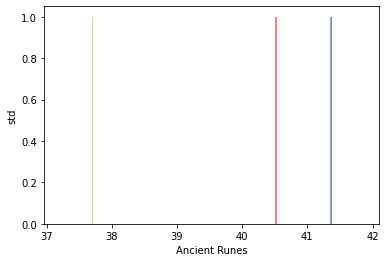

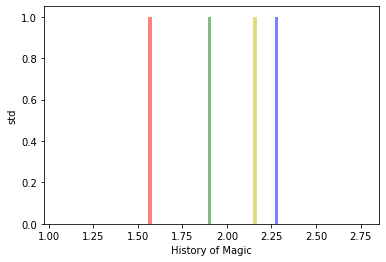

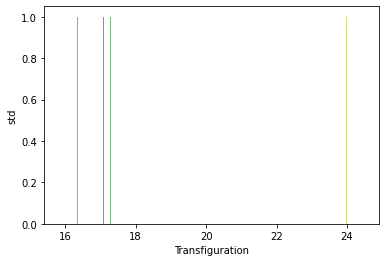

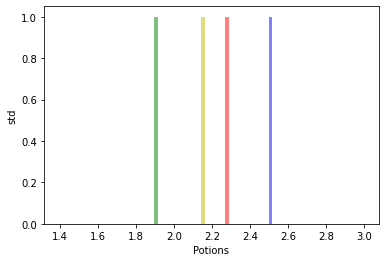

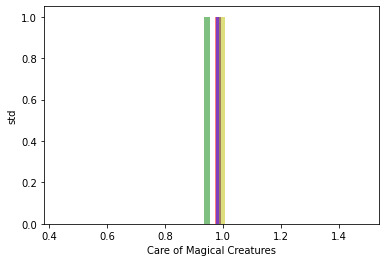

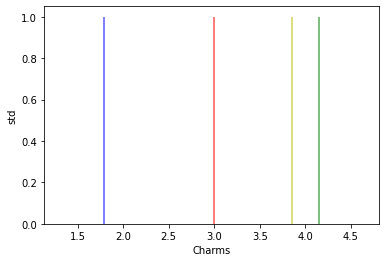

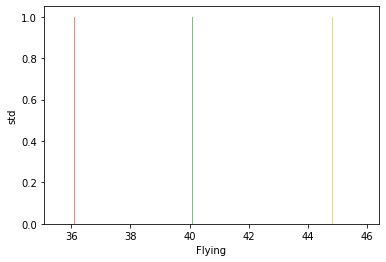

In [19]:
# **************************************************************************** #
#                                                                              #
#                                                         :::      ::::::::    #
#    main.py                                            :+:      :+:    :+:    #
#                                                     +:+ +:+         +:+      #
#    By: samuel <samuel@student.42.fr>              +#+  +:+       +#+         #
#                                                 +#+#+#+#+#+   +#+            #
#    Created: 2020/05/20 19:04:56 by sbelondr          #+#    #+#              #
#    Updated: 2020/05/27 13:52:59 by samuel           ###   ########.fr        #
#                                                                              #
# **************************************************************************** #

from pylib.ft_open_csv import ft_open_csv
from describe import ft_describe
import matplotlib.pyplot as plt

from pylib.math import *

import numpy as np

def separate_value(df, column, rm_old_column):
    all_categ = df[str(column)]
    all_categ = list(set(all_categ))
    result = []

    for categ in all_categ:
        tmp = df[str(column)] == categ
        data = df[tmp] # np.array(df[tmp].iloc[:, rm_old_column:], dtype=float)
        result.append(data)
    return all_categ, result

def get_name_column_number(df):
    '''
    Returns:
        array with name column contain only number
    '''
    my_lst = list(df)
    cols = []
    for x in my_lst:
        if np.issubdtype(df[x].dtype, np.number):
            cols.append(x)
    return cols
    

def calc_std(df, all_X, categs):
    cols = get_name_column_number(df)
    
    for col in cols:
        if not col == 'Index':
            h1 = np.array(ft_std(all_X[0][col]))
            h2 = ft_std(all_X[1][col])
            h3 = ft_std(all_X[2][col])
            h4 = ft_std(all_X[3][col])
        
            plt.hist(h1, 50, alpha=0.5, color='r')
            plt.hist(h2, 50, alpha=0.5, color='g')
            plt.hist(h3, 50, alpha=0.5, color='b')
            plt.hist(h4, 50, alpha=0.5, color='y')
            plt.xlabel(col)
            plt.ylabel('std')
            plt.show()

def histogram():
    df = ft_open_csv('ressources/datasets/dataset_train.csv')
    # drop nan value
    df.dropna()
    categs, all_X = separate_value(df, 'Hogwarts House', 6)
    # drop value useless
    # all_X = delete_column(all_X, ['Index', 'Hogwarts House', 'First Name', 'Last Name', 'Birthday', 'Best Hand'])
    clr = ['red', 'blue', 'orange', 'green', 'purple', 'grey']
    i = 0
    calc_std(df, all_X, categs)

histogram()